In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league-matches-20232024-season/matches.csv


In [2]:
pd.set_option('display.max_columns', None)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Load the Data

In [3]:
df = pd.read_csv('/kaggle/input/english-premier-league-matches-20232024-season/matches.csv')
df.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,Virgil van Dijk,4-3-3,Anthony Taylor,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2024,Liverpool
1,1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,64.0,53145.0,Virgil van Dijk,4-3-3,Thomas Bramall,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2024,Liverpool
2,2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,52214.0,Virgil van Dijk,4-3-3,John Brooks,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2024,Liverpool
3,3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,63.0,50109.0,Trent Alexander-Arnold,4-3-3,Simon Hooper,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2024,Liverpool
4,4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,65.0,31257.0,Andrew Robertson,4-3-3,Michael Oliver,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2024,Liverpool


### Understand the Data

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

* 'GF':'goals_for'
* 'GA':'goals_against',
* 'xG':'expected_goals_for_team'
* 'xga':'expected_goals_against_team'
* 'poss':'possession_percentage'
* 'sh':'shots'
* 'sot':'shots_on_target',
* 'dist':'avg_distance_meter'
* 'fk':'free_kick'
* 'pk':'penalty_kick'
* 'pkatt':'penalty_kicks_attempted'

In [5]:
df.shape

(456, 28)

In [6]:
df.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,0.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.0
mean,14.263158,1.600877,1.600877,1.526535,1.526535,50.000000,38513.447368,NaN,13.269737,4.493421,16.723246,0.364035,0.129386,0.144737,2024.0
std,8.943095,1.305407,1.305407,0.871514,0.871514,13.771766,17837.844706,NaN,5.645152,2.560898,2.968203,0.577167,0.355077,0.376354,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10290.000000,NaN,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2024.0
25%,6.000000,1.000000,1.000000,0.900000,0.900000,39.000000,24444.750000,NaN,9.000000,3.000000,14.875000,0.000000,0.000000,0.000000,2024.0
50%,14.000000,1.000000,1.000000,1.300000,1.300000,50.000000,38440.500000,NaN,12.000000,4.000000,16.600000,0.000000,0.000000,0.000000,2024.0
75%,21.000000,2.000000,2.000000,2.100000,2.100000,61.000000,53170.750000,NaN,16.000000,6.000000,18.425000,1.000000,0.000000,0.000000,2024.0
max,35.000000,8.000000,8.000000,7.000000,7.000000,80.000000,73612.000000,NaN,34.000000,15.000000,39.900000,2.000000,2.000000,2.000000,2024.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    456 non-null    int64  
 1   Date          456 non-null    object 
 2   Time          456 non-null    object 
 3   Comp          456 non-null    object 
 4   Round         456 non-null    object 
 5   Day           456 non-null    object 
 6   Venue         456 non-null    object 
 7   Result        456 non-null    object 
 8   GF            456 non-null    float64
 9   GA            456 non-null    float64
 10  Opponent      456 non-null    object 
 11  xG            456 non-null    float64
 12  xGA           456 non-null    float64
 13  Poss          456 non-null    float64
 14  Attendance    456 non-null    float64
 15  Captain       456 non-null    object 
 16  Formation     456 non-null    object 
 17  Referee       456 non-null    object 
 18  Match Report  456 non-null    

### Data Visualization

Text(0, 0.5, 'Matches played')

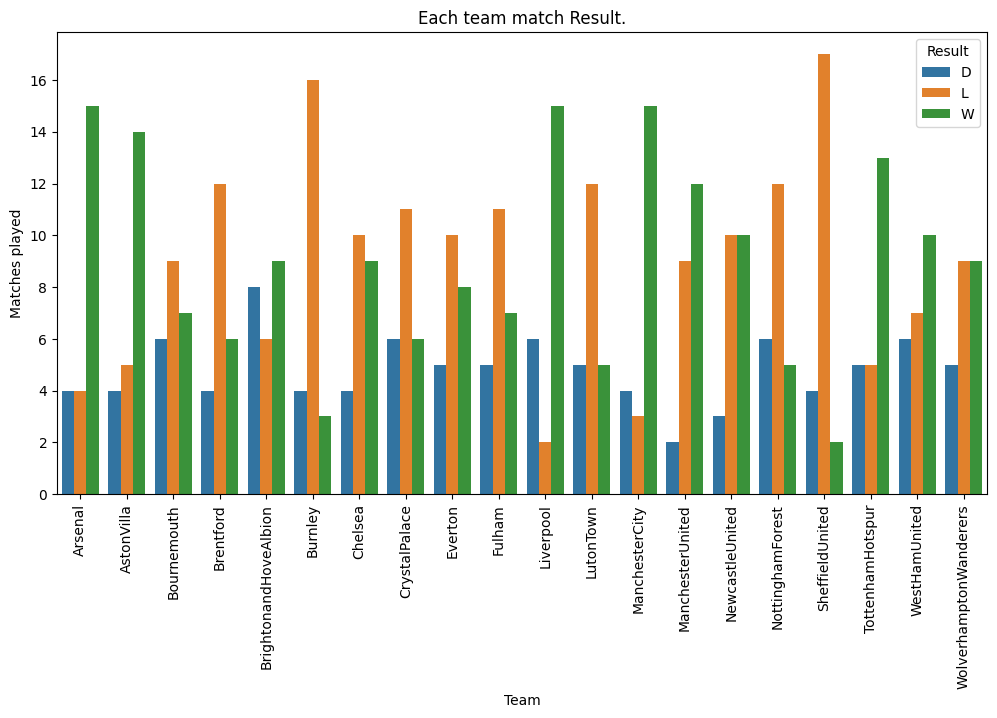

In [8]:
plt.rcParams['figure.figsize'] = (12, 6)
match = df.groupby(['Team', 'Result']).size().reset_index().rename(columns={0: 'match'})
sb.barplot(x = match['Team'], y =  match['match'], data = match, hue = match['Result'])
plt.title('Each team match Result.')
plt.xticks(rotation=90)
plt.ylabel('Matches played')

Text(0.5, 1.0, 'The day of the week the match was played.')

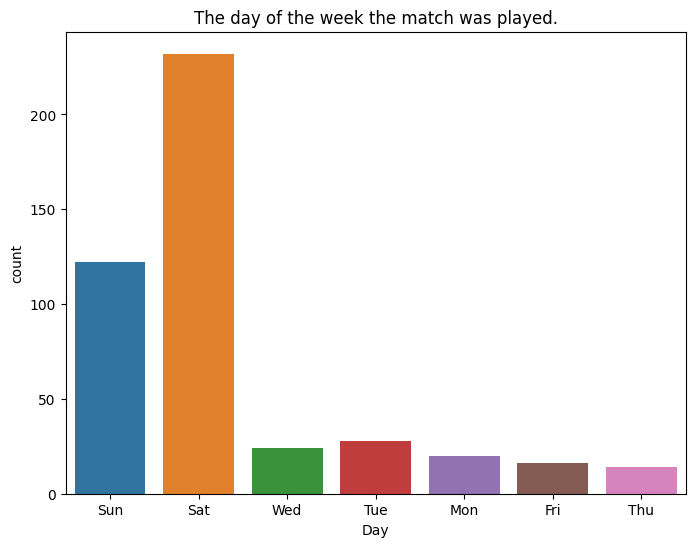

In [9]:
plt.figure(figsize = (8, 6))
sb.countplot(x = df['Day'], data = df)
plt.title('The day of the week the match was played.')

Observation: 

1. Maximum matches played at Sarturday

2. Minimun palyed at Friday and Thursday

In [10]:
df['Venue'].value_counts()

Venue
Away    228
Home    228
Name: count, dtype: int64

In [11]:
df['Result'].value_counts()

Result
W    180
L    180
D     96
Name: count, dtype: int64

Text(0, 0.5, 'Goal For')

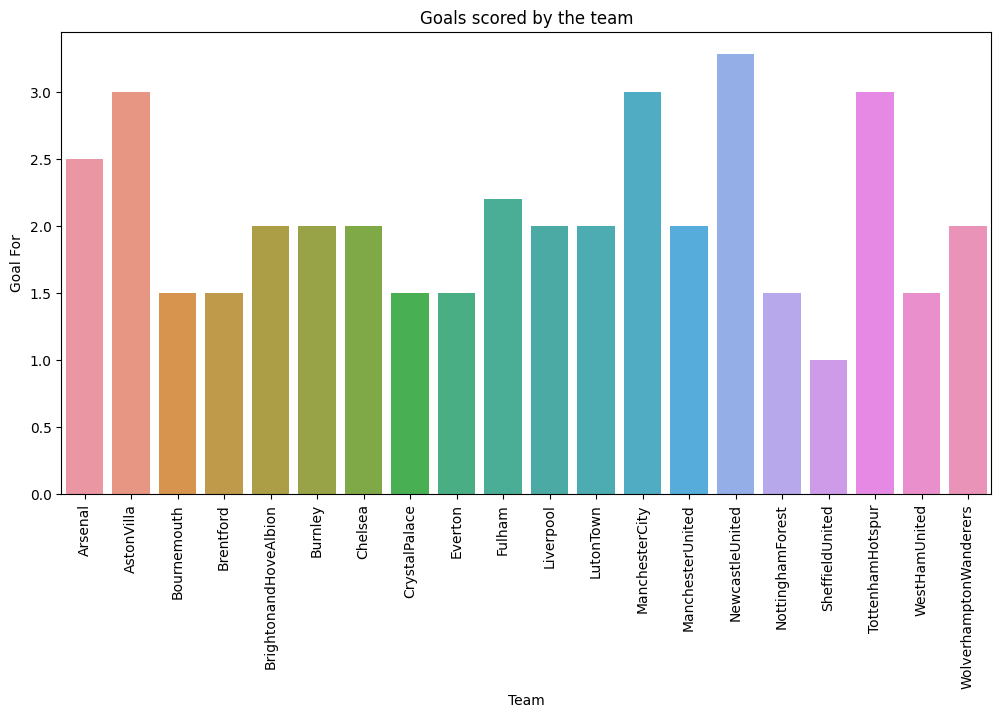

In [12]:
goals_by_team = df.groupby(['Team', 'GF']).size().reset_index().rename(columns={0: 'goals'})
sb.barplot(x= goals_by_team['Team'], y = goals_by_team['GF'], data = goals_by_team, errorbar=None)
plt.title('Goals scored by the team')
plt.xticks(rotation=90)
plt.ylabel('Goal For')

Observation: 
1. NewcastleUnited Team has the Highest goals
2. SheffieldUnited has the lowest goals

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Possession percentage during matches')

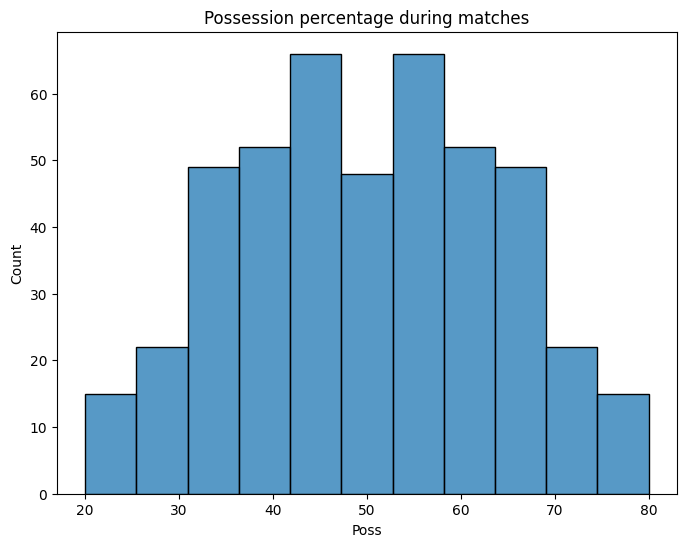

In [13]:
plt.figure(figsize = (8, 6))
sb.histplot(x = df['Poss'])
plt.title('Possession percentage during matches')

In [14]:
# Total number of Spectators in all the matches
df['Attendance'].sum()

17562132.0

Text(0, 0.5, 'No. of Matches')

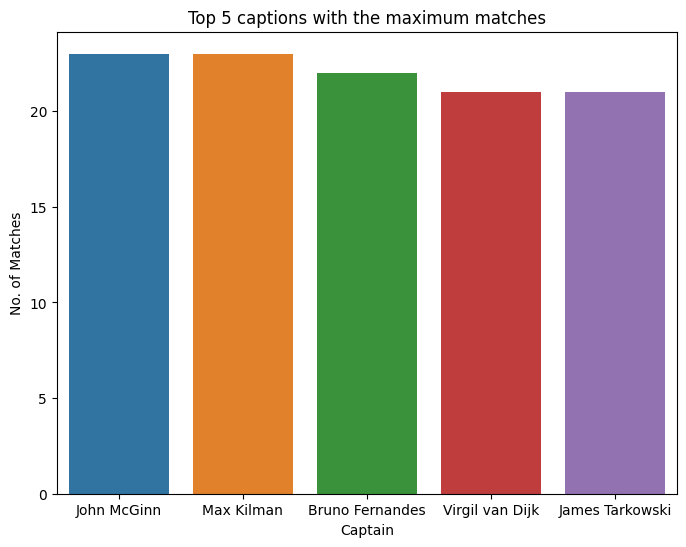

In [15]:
caption_names = df['Captain'].value_counts().head().index
caption_matches = df['Captain'].value_counts().head().values

plt.figure(figsize = (8, 6))
sb.barplot(x = caption_names, y = caption_matches)
plt.title('Top 5 captions with the maximum matches')
plt.ylabel('No. of Matches')

Text(0, 0.5, 'No. of Matches')

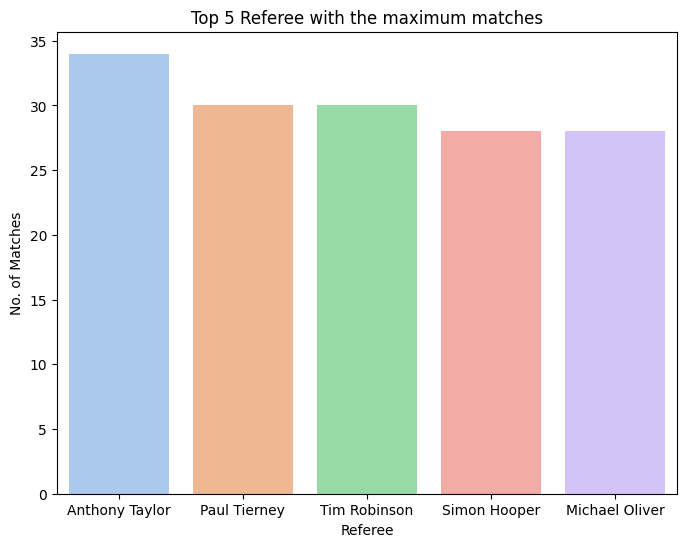

In [16]:
Referee_names = df['Referee'].value_counts().head().index
Referee_matches = df['Referee'].value_counts().head().values

plt.figure(figsize = (8, 6))
sb.barplot(x = Referee_names, y = Referee_matches, palette= 'pastel')
plt.title('Top 5 Referee with the maximum matches')
plt.ylabel('No. of Matches')

Text(0, 0.5, 'Matches played')

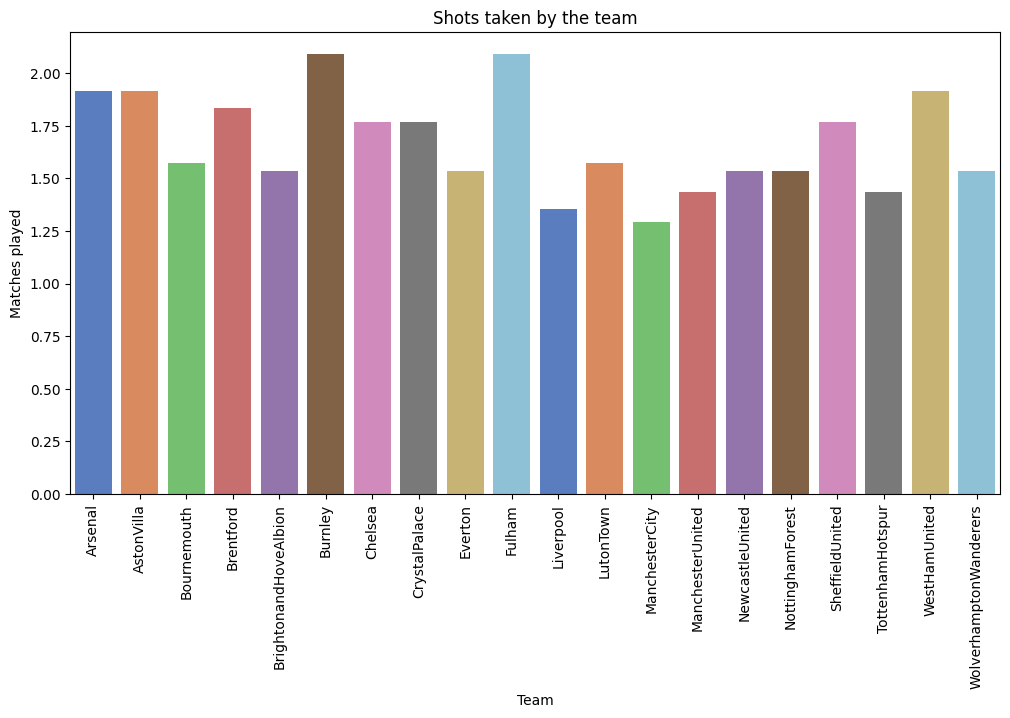

In [17]:
plt.rcParams['figure.figsize'] = (12, 6)
match = df.groupby(['Team', 'Sh']).size().reset_index().rename(columns={0: 'match'})
sb.barplot(x = match['Team'], y =  match['match'], data = match, palette= 'muted',errorbar=None)
plt.title('Shots taken by the team')
plt.xticks(rotation=90)
plt.ylabel('Matches played')

Text(0, 0.5, 'Matches played')

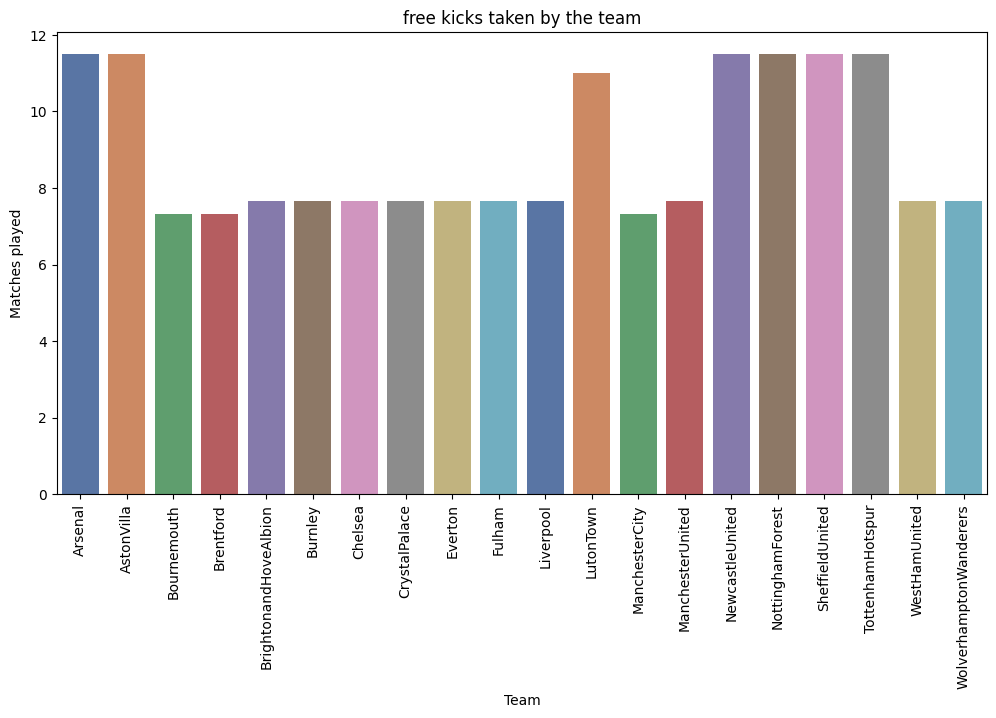

In [18]:
plt.rcParams['figure.figsize'] = (12, 6)
match = df.groupby(['Team', 'FK']).size().reset_index().rename(columns={0: 'match'})
sb.barplot(x = match['Team'], y =  match['match'], data = match, palette= 'deep',errorbar=None)
plt.title('free kicks taken by the team')
plt.xticks(rotation=90)
plt.ylabel('Matches played')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Distance')

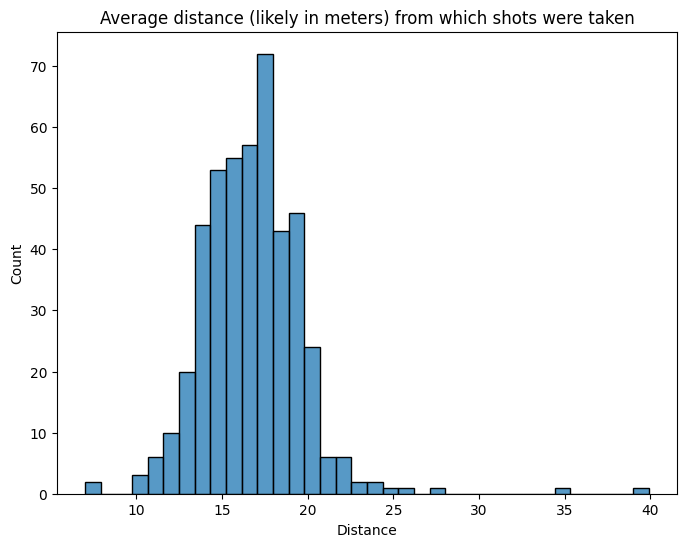

In [19]:
plt.figure(figsize = (8, 6))
sb.histplot(df['Dist'])
plt.title('Average distance (likely in meters) from which shots were taken')
plt.xlabel('Distance')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'No. of Matches')

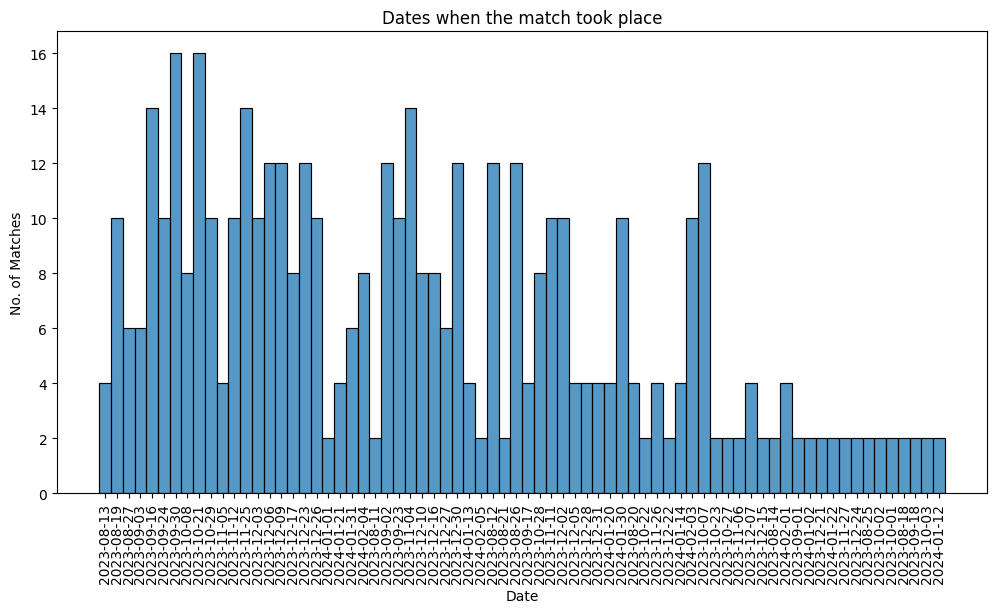

In [20]:
sb.histplot(df['Date'])
plt.xticks(rotation=90)
plt.title('Dates when the match took place')
plt.ylabel('No. of Matches')

Text(0, 0.5, 'Matches played')

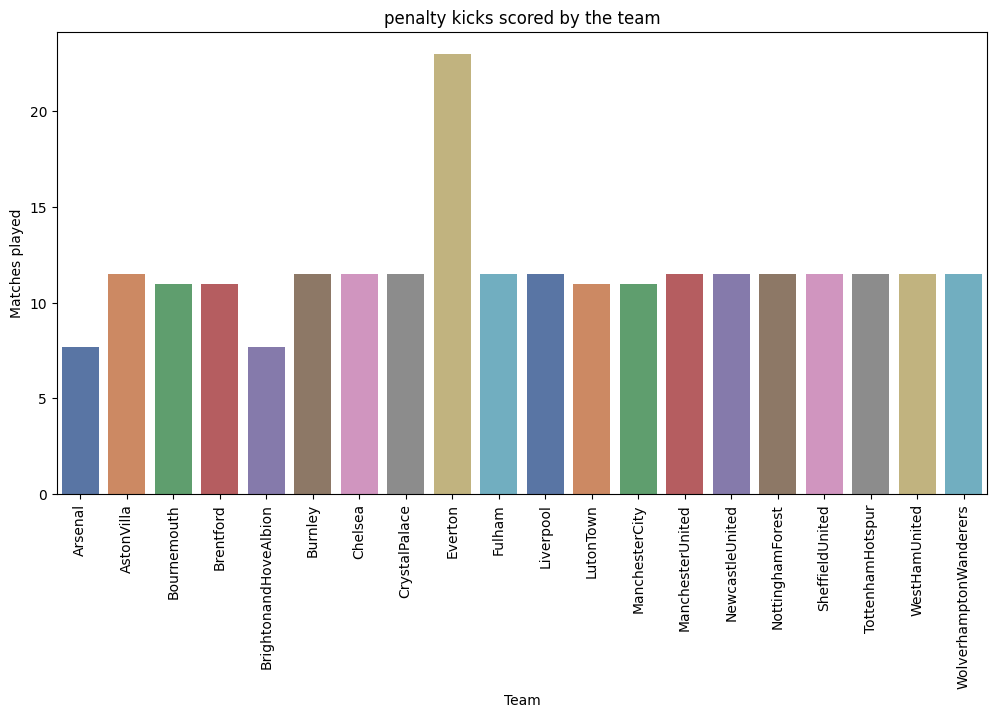

In [21]:
plt.rcParams['figure.figsize'] = (12, 6)
match = df.groupby(['Team', 'PK']).size().reset_index().rename(columns={0: 'match'})
sb.barplot(x = match['Team'], y =  match['match'], data = match, palette= 'deep',errorbar=None)
plt.title('penalty kicks scored by the team')
plt.xticks(rotation=90)
plt.ylabel('Matches played')

### Feature Engineering

#### Missing Values

In [22]:
df.isnull().sum()

Unnamed: 0        0
Date              0
Time              0
Comp              0
Round             0
Day               0
Venue             0
Result            0
GF                0
GA                0
Opponent          0
xG                0
xGA               0
Poss              0
Attendance        0
Captain           0
Formation         0
Referee           0
Match Report      0
Notes           456
Sh                0
SoT               0
Dist              0
FK                0
PK                0
PKatt             0
Season            0
Team              0
dtype: int64

In [23]:
df.drop(columns = ['Notes','Unnamed: 0'], inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          456 non-null    object 
 1   Time          456 non-null    object 
 2   Comp          456 non-null    object 
 3   Round         456 non-null    object 
 4   Day           456 non-null    object 
 5   Venue         456 non-null    object 
 6   Result        456 non-null    object 
 7   GF            456 non-null    float64
 8   GA            456 non-null    float64
 9   Opponent      456 non-null    object 
 10  xG            456 non-null    float64
 11  xGA           456 non-null    float64
 12  Poss          456 non-null    float64
 13  Attendance    456 non-null    float64
 14  Captain       456 non-null    object 
 15  Formation     456 non-null    object 
 16  Referee       456 non-null    object 
 17  Match Report  456 non-null    object 
 18  Sh            456 non-null    

#### Handling Categorical Features

In [25]:
# Date and Time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

df['date_year'] = df['Date'].dt.year
df['date_month_no'] = df['Date'].dt.month
df['date_day'] = df['Date'].dt.day

df['hour'] = df['Time'].dt.hour
df['min'] = df['Time'].dt.minute

/tmp/ipykernel_18/2889395049.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [26]:
df['Comp'].value_counts()

Comp
Premier League    456
Name: count, dtype: int64

In [27]:
df.drop(columns = ['Date', 'Time', 'Comp', 'Match Report'], inplace = True)

In [28]:
# Round column
df['Round'].value_counts()

Round
Matchweek 1     20
Matchweek 2     20
Matchweek 22    20
Matchweek 21    20
Matchweek 20    20
Matchweek 19    20
Matchweek 16    20
Matchweek 15    20
Matchweek 14    20
Matchweek 13    20
Matchweek 12    20
Matchweek 11    20
Matchweek 10    20
Matchweek 9     20
Matchweek 8     20
Matchweek 7     20
Matchweek 6     20
Matchweek 5     20
Matchweek 4     20
Matchweek 3     20
Matchweek 23    20
Matchweek 17    18
Matchweek 18    18
Name: count, dtype: int64

In [29]:
df['Round']= df['Round'].str.replace('Matchweek ', '')

In [30]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

Round: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23']
Day: ['Sun' 'Sat' 'Wed' 'Tue' 'Mon' 'Fri' 'Thu']
Venue: ['Away' 'Home']
Result: ['D' 'W' 'L']
GF: [1. 3. 2. 4. 0. 5. 6. 8.]
GA: [1. 0. 2. 3. 4. 5. 6. 8.]
Opponent: ['Chelsea' 'Bournemouth' 'Newcastle Utd' 'Aston Villa' 'Wolves' 'West Ham'
 'Tottenham' 'Brighton' 'Everton' "Nott'ham Forest" 'Luton Town'
 'Brentford' 'Manchester City' 'Fulham' 'Sheffield Utd' 'Crystal Palace'
 'Manchester Utd' 'Arsenal' 'Burnley' 'Liverpool']
xG: [1.3 3.  0.9 2.5 2.3 2.2 3.2 2.6 1.7 0.6 2.1 1.2 1.  1.8 7.  1.5 2.9 0.4
 1.9 3.5 3.6 0.5 0.8 4.  1.6 2.4 2.  3.4 2.8 1.4 0.7 2.7 3.3 1.1 3.8 4.1
 0.3 3.9 3.1 3.7 0.2 0.1 0. ]
xGA: [1.4 1.3 2.  0.7 0.6 1.1 2.2 2.3 0.1 0.4 0.8 1.6 1.2 1.  1.7 3.5 0.3 0.9
 2.9 0.5 1.8 0.  3.3 2.5 2.6 2.1 4.1 3.2 4.  2.4 1.5 3.6 3.  1.9 2.7 3.1
 3.8 7.  2.8 3.4 3.7 0.2 3.9]
Poss: [35. 64. 41. 63. 65. 36. 54. 77. 72. 73. 59. 61. 75. 76. 68. 52. 60. 50.
 57. 79. 51. 55.

In [31]:
df.head(1)

,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,date_year,date_month_no,date_day,hour,min
0,1,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,Virgil van Dijk,4-3-3,Anthony Taylor,13.0,1.0,17.8,0.0,0,0,2024,Liverpool,2023,8,13,16,30


In [32]:
columns = ['Day', 'Venue', 'Opponent', 'Captain', 'Referee', 'Team']

ohe = OneHotEncoder(drop='first', sparse=True, dtype=np.int32)
new_columns = ohe.fit_transform(df[columns])
column_names = ohe.get_feature_names_out(columns)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
df_new = pd.DataFrame(new_columns.toarray(), columns=column_names)
df_new.head()

,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Captain_Amari'i Bell,Captain_Andrew Robertson,Captain_Anel Ahmedhodžić,Captain_Angelo Ogbonna,Captain_Ben Chilwell,Captain_Bobby Reid,Captain_Bruno Fernandes,Captain_Bukayo Saka,Captain_Carlton Morris,Captain_Chris Basham,Captain_Christian Nørgaard,Captain_Conor Gallagher,Captain_Cristian Romero,Captain_Dan Burn,Captain_Felipe,Captain_Ivan Toney,Captain_Jack Robinson,Captain_Jamaal Lascelles,Captain_James Tarkowski,Captain_James Ward-Prowse,Captain_Joe Worrall,Captain_Joel Ward,Captain_John Egan,Captain_John McGinn,Captain_Jorginho,Captain_Josh Brownhill,Captain_Josh Cullen,Captain_Kevin De Bruyne,Captain_Kieran Trippier,Captain_Kurt Zouma,Captain_Kyle Walker,Captain_Levi Colwill,Captain_Lewis Dunk,Captain_Lloyd Kelly,Captain_Marc Guéhi,Captain_Martin Ødegaard,Captain_Max Kilman,Captain_Morgan Gibbs-White,Captain_Neto,Captain_Oliver Norwood,Captain_Pascal Groß,Captain_Pelly Ruddock Mpanzu,Captain_Reece James,Captain_Ryan Yates,Captain_Scott McTominay,Captain_Serge Aurier,Captain_Son Heung-min,Captain_Séamus Coleman,Captain_Tim Ream,Captain_Tom Cairney,Captain_Tom Lockyer,Captain_Tomáš Souček,Captain_Trent Alexander-Arnold,Captain_Virgil van Dijk,Captain_Vitaly Janelt,Referee_Anthony Taylor,Referee_Chris Kavanagh,Referee_Craig Pawson,Referee_Darren Bond,Referee_Darren England,Referee_David Coote,Referee_Graham Scott,Referee_Jarred Gillett,Referee_John Brooks,Referee_Joshua Smith,Referee_Michael Oliver,Referee_Michael Salisbury,Referee_Paul Tierney,Referee_Peter Bankes,Referee_Rebecca Welch,Referee_Robert Jones,Referee_Robert Madley,Referee_Samuel Allison,Referee_Samuel Barrott,Referee_Simon Hooper,Referee_Stuart Attwell,Referee_Thomas Bramall,Referee_Tim Robinson,Referee_Tony Harrington,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
df = pd.concat([df, df_new], axis=1)

In [35]:
df.drop(columns = ['Day', 'Venue', 'Opponent', 'Captain', 'Referee', 'Team'], inplace = True)

In [36]:
# Label encoding for predicted column "Result"
le = LabelEncoder()
df['Result']= le.fit_transform(df['Result']) 

In [37]:
columns_to_convert = ['Round','GF', 'GA', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT', 'Dist', 'FK']

# Convert each column to int
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [38]:
df.head()

,Round,Result,GF,GA,xG,xGA,Poss,Attendance,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,date_year,date_month_no,date_day,hour,min,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Captain_Amari'i Bell,Captain_Andrew Robertson,Captain_Anel Ahmedhodžić,Captain_Angelo Ogbonna,Captain_Ben Chilwell,Captain_Bobby Reid,Captain_Bruno Fernandes,Captain_Bukayo Saka,Captain_Carlton Morris,Captain_Chris Basham,Captain_Christian Nørgaard,Captain_Conor Gallagher,Captain_Cristian Romero,Captain_Dan Burn,Captain_Felipe,Captain_Ivan Toney,Captain_Jack Robinson,Captain_Jamaal Lascelles,Captain_James Tarkowski,Captain_James Ward-Prowse,Captain_Joe Worrall,Captain_Joel Ward,Captain_John Egan,Captain_John McGinn,Captain_Jorginho,Captain_Josh Brownhill,Captain_Josh Cullen,Captain_Kevin De Bruyne,Captain_Kieran Trippier,Captain_Kurt Zouma,Captain_Kyle Walker,Captain_Levi Colwill,Captain_Lewis Dunk,Captain_Lloyd Kelly,Captain_Marc Guéhi,Captain_Martin Ødegaard,Captain_Max Kilman,Captain_Morgan Gibbs-White,Captain_Neto,Captain_Oliver Norwood,Captain_Pascal Groß,Captain_Pelly Ruddock Mpanzu,Captain_Reece James,Captain_Ryan Yates,Captain_Scott McTominay,Captain_Serge Aurier,Captain_Son Heung-min,Captain_Séamus Coleman,Captain_Tim Ream,Captain_Tom Cairney,Captain_Tom Lockyer,Captain_Tomáš Souček,Captain_Trent Alexander-Arnold,Captain_Virgil van Dijk,Captain_Vitaly Janelt,Referee_Anthony Taylor,Referee_Chris Kavanagh,Referee_Craig Pawson,Referee_Darren Bond,Referee_Darren England,Referee_David Coote,Referee_Graham Scott,Referee_Jarred Gillett,Referee_John Brooks,Referee_Joshua Smith,Referee_Michael Oliver,Referee_Michael Salisbury,Referee_Paul Tierney,Referee_Peter Bankes,Referee_Rebecca Welch,Referee_Robert Jones,Referee_Robert Madley,Referee_Samuel Allison,Referee_Samuel Barrott,Referee_Simon Hooper,Referee_Stuart Attwell,Referee_Thomas Bramall,Referee_Tim Robinson,Referee_Tony Harrington,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers
0,1,0,1,1,1,1,35,40096,4-3-3,13,1,17,0,0,0,2024,2023,8,13,16,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,2,3,1,3,1,64,53145,4-3-3,25,9,16,1,0,1,2024,2023,8,19,15,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,2,2,1,0,2,41,52214,4-3-3,9,4,17,1,0,0,2024,2023,8,27,16,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,2,3,0,2,0,63,50109,4-3-3,17,4,14,0,0,0,2024,2023,9,3,14,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,2,3,1,2,0,65,31257,4-3-3,16,5,15,0,0,0,2024,2023,9,16,12,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [39]:
df.dtypes == 'object'

Round                          False
Result                         False
GF                             False
GA                             False
xG                             False
                               ...  
Team_NottinghamForest          False
Team_SheffieldUnited           False
Team_TottenhamHotspur          False
Team_WestHamUnited             False
Team_WolverhamptonWanderers    False
Length: 145, dtype: bool

In [40]:
df.shape

(456, 145)

In [41]:
X = df.drop(columns = 'Result')
y = df['Result']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 144)
(92, 144)
(364,)
(92,)
